<a href="https://colab.research.google.com/github/uvsinn/wool_time_series_analysis/blob/main/Time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from prophet import Prophet
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly

In [18]:
data=pd.read_csv('/content/10years data - Sheet1.csv')

In [19]:
data.head()

,Date,Raw Cotton,Medium,Long,Extra Long,Cotton Yarn(Hanks),Cotton Yarn(Cones),Cotton Yarn(Hosiery Cones),Poly. Vis. Blended Yarn,Poly. Cott. Blended Yarn,...,Sack BTwills 2 1/4LBS(FAS\nRs/100 Bags),B.Twills 2 1/4 LBS (FOR\nRs/100 Bags),B.Twills(50 Kgs) FOR Rs/M.T.,Merino Wool (Imported),Woolen Yarn,Weaving 2/48,Shoddy Yarn (Fine),Shoddy Yarn (Medium),Shoddy Yarn (Coarse),Dupion Silk
0,1/1/2009,64.36,56.96,59.91,71.16,109.12,124.64,119.50,126.51,126.5,...,3701.08,3592.39,37500.00,238.33,367.56,590.0,122.5,80.0,55.0,720.0
1,2/1/2009,61.22,52.52,56.82,67.92,107.70,124.03,118.25,130.34,130.5,...,3609.37,3573.95,35995.83,255.44,367.56,590.0,122.5,80.0,55.0,726.0
2,3/1/2009,61.75,51.82,58.22,73.41,110.15,124.41,124.50,124.30,125.5,...,3653.00,3613,36504.00,277.66,320.47,415.0,122.5,80.0,62.5,723.0
3,4/1/2009,61.18,54.91,61.60,78.19,108.83,124.26,123.50,134.97,133.0,...,3753.40,3695.45,38222.72,280.24,320.47,415.0,122.5,80.0,62.5,683.0
4,5/1/2009,61.86,55.97,63.98,78.75,107.49,125.08,124.00,139.98,138.0,...,3868.75,3822.91,38795.83,289.77,320.47,415.0,122.5,80.0,62.5,609.0


In [20]:
df=data[["Date", "Raw Cotton"]]

In [21]:
df.head()

,Date,Raw Cotton
0,1/1/2009,64.36
1,2/1/2009,61.22
2,3/1/2009,61.75
3,4/1/2009,61.18
4,5/1/2009,61.86


In [22]:
df.columns=['ds','y']

In [23]:
df['ds']=pd.to_datetime(df['ds'])
df.tail()

<ipython-input-23-39e438f4b71a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds']=pd.to_datetime(df['ds'])


,ds,y
119,2018-12-01,118.17
120,2019-01-01,114.44
121,2019-02-01,112.48
122,2019-03-01,119.89
123,2019-04-01,125.69


<Axes: xlabel='ds'>

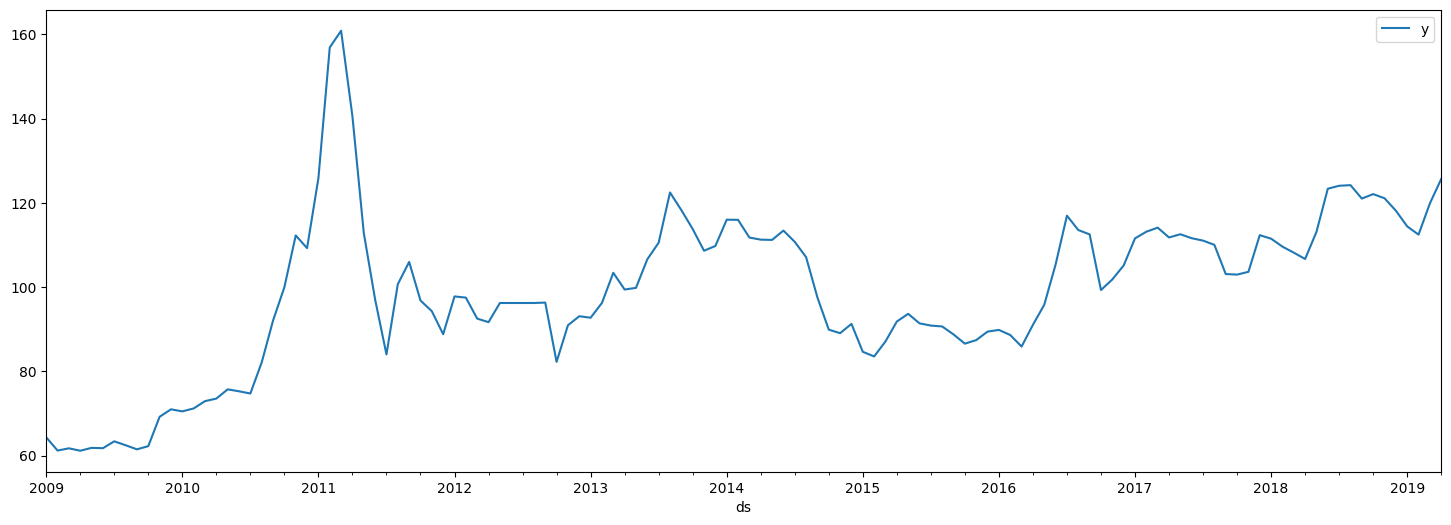

In [24]:
df.plot(x='ds',y='y', figsize=(18,6))

In [25]:
train=df.iloc[:len(df)-16]
test=df.iloc[len(df)-16]


In [26]:
m=Prophet()
m.fit(train)
future=m.make_future_dataframe(periods=16, freq='M')
forecast=m.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuecvdw9g/j5u0np_i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuecvdw9g/fkkgc_e1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93032', 'data', 'file=/tmp/tmpuecvdw9g/j5u0np_i.json', 'init=/tmp/tmpuecvdw9g/fkkgc_e1.json', 'output', 'file=/tmp/tmpuecvdw9g/prophet_model2ayesi2g/prophet_model-20231002181610.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:16:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:16:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [27]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
119,2018-11-30,109.844881,88.186556,128.042518,109.622147,110.086227,-1.246486,-1.246486,-1.246486,-1.246486,-1.246486,-1.246486,0.0,0.0,0.0,108.598395
120,2018-12-31,110.026775,90.665143,130.753350,109.776627,110.297700,-0.111322,-0.111322,-0.111322,-0.111322,-0.111322,-0.111322,0.0,0.0,0.0,109.915453
121,2019-01-31,110.208670,93.148038,132.634800,109.921137,110.504723,2.550966,2.550966,2.550966,2.550966,2.550966,2.550966,0.0,0.0,0.0,112.759636
122,2019-02-28,110.372961,95.521531,137.441178,110.059074,110.703681,4.805520,4.805520,4.805520,4.805520,4.805520,4.805520,0.0,0.0,0.0,115.178481
123,2019-03-31,110.554856,92.680629,131.182136,110.205671,110.919581,1.966019,1.966019,1.966019,1.966019,1.966019,1.966019,0.0,0.0,0.0,112.520875


In [28]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
119,2018-11-30,108.598395,88.186556,128.042518
120,2018-12-31,109.915453,90.665143,130.753350
121,2019-01-31,112.759636,93.148038,132.634800
122,2019-02-28,115.178481,95.521531,137.441178
123,2019-03-31,112.520875,92.680629,131.182136


In [29]:
plot_plotly(m,forecast)